# 이제 분류가 아닌 회귀이다! 

2장에서는 어떤 클래스에 속하는지를 확인했다면 3장에서는 특성을 파악해서 **특정값**을 예측을 합니다. 

+ 지도학습의 대분류 회귀와 분류가 있습니다. 

### 회귀: 두 변수 사이의 상관관계를 분석하는 방법을 의미합니다. 

회귀는 특정한 값을 예측하는 것이고, 분류는 카테고리를 예측합니다.    

+ knn을 통한 회귀: k개의 클래스의 평균값을 구합니다. 

+ [1,2,3] = 크기(3,) 1차원 배열
+ [[1],
   [2],
   [3]] = 크기(3,1) 2차원 배열 

+ numpy배열의 크기를 바꾼다는 것은 위와 같이 1차원배열을 다차원으로 변경한다는 의미입니다.  np.reshape()을 사용합니다. 

    - reshape() 사용시 주의사항
        - 원본 배열의 원소 개수와 지정한 크기가 같아야 한다. 
        - -1을 채워 넣으면 알아서 숫자를 지정해 준다. 
        
        
+ score의 정의 
    - knr.score()는 분류일 경우는 샘플을 정확하게 분류한 개수의 비율을 나타냅니다!



In [1]:
# 모듈 불러오기 
import numpy as np 
import pandas as pd

In [2]:
#데이터 준비 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

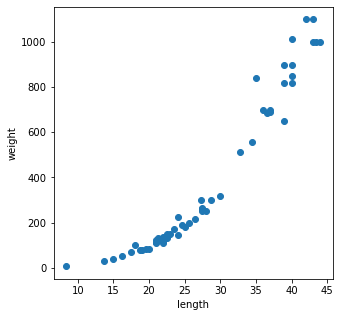

In [3]:
#산점도 그리기 
#둘 다 수치형데이터이기 때문에 산점도를 확인합니다. 
# 하나는 카테고리형, 하나는 수치형이라면 boxplot # 둘 다 카테고리형이라면 countplot을 그리면 좋습니다. 
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
#train,testset split
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,random_state=42)


In [5]:
display(train_input, train_target)
print(len(train_input))
print(len(train_target))

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

42
42


In [6]:
#1차원 배열은 sklearn에 안들어갑니다. 1차원배열이라는 것은 데이터가 누워있는 것이다. 일으켜 세웁시다!
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [7]:
#shape을 변경합니다. 
test_array = test_array.reshape(2,2)
test_array

array([[1, 2],
       [3, 4]])

In [8]:
test_array = test_array.reshape(3,2)
test_array

ValueError: cannot reshape array of size 4 into shape (3,2)

In [9]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [10]:
#모델 불러오기 
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
print(knr.score(test_input,test_target))

0.992809406101064


array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [ ]:
#모듈 불러오기 
import numpy as np
import pandas as pd

In [ ]:
#데이터 준비 
#perch가 농어인가보다 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
fish_data = np.column_stack([perch_length,perch_weight])


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()
#데이터의 스케일링이 필요하다. 

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state=42)